In this notebook, I will investigate the degree of missingness. First on the X, and then the autosomes.

In [2]:
%run ../scripts/notebook_settings.py

In [3]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")

Creating the gt dataframe

In [4]:
gt = allel.GenotypeArray(callset["calldata/GT"])

Testing missingness per individual

In [5]:
missingness = gt.is_missing()

In [6]:
m_per_i = sum(missingness)
total_sites = len(gt)

In [7]:
d = {"m": m_per_i/total_sites, "ID": meta_data_samples["PGDP_ID"], "sex": meta_data_samples["Sex"]}
m_df = pd.DataFrame(data=d)

<AxesSubplot:xlabel='m', ylabel='Count'>

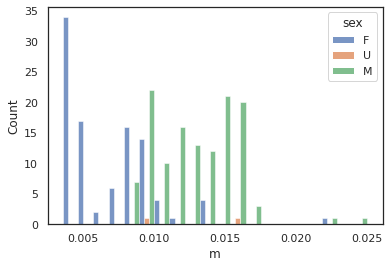

In [8]:
sns.histplot(m_df, x="m", hue="sex", multiple="dodge", bins=20)

In [11]:
m_df.loc[(m_df.m > 0.020)]

,m,ID,sex
6,0.022163,38168,F
8,0.021821,97124,M
9,0.024995,PD_0067,M


The two outliers (m=0.025 and f=0.015) are quite problematic.
m=0.025 is the captive individual. f=0.015 is an individual Kasper previously removed from the zarr.
# I redid this analysis after second round of updating metadata.
There is now 3 individuals with high missingness, plus 2 unknown individuals. Their gender will be decided in a heterozygosity investigation.

Checking the missingness on an autosome.

In [14]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chr7"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt = allel.GenotypeArray(callset["calldata/GT"])

In [ ]:
missingness = gt.is_missing()
m_per_i = sum(missingness)
total_sites = len(gt)
d = {"m": m_per_i/total_sites, "ID": meta_data_samples["PGDP_ID"], "sex": meta_data_samples["Sex"]}
m_chr7_df = pd.DataFrame(data=d)
sns.histplot(m_chr7_df, x="m", hue="sex", multiple="dodge", bins=20)

In [ ]:
m_chr7_df.loc[(m_chr7_df.m > 0.01)]